# Table of Contents
1. [Data Import and EDA](#DIC)
    - 1.1 [IsFraud](#IF)
    - 1.2 [TransactioAmt](#TAmt)
    - 1.3 [ProductCD](#PCD)
    - 1.4 [Card1 - Card6](#cardfeatures)
    - 1.5 [Email Domains](#ED)
    - 1.6 [C1 - C14](#CFeatures)
    - 1.7 [M1 -M9](#MFeatures)
    - 1.8 [TransactionDT](#TDT)
2. [Feature Engineering](#FE)
3. [Model](#model)
4. [References](#ref)

Importing necessary modules

In [1]:
# If a module is not found Install a pip package in the current Jupyter kernel using 
#!{sys.executable} -m pip install Module-Name
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns; sns.set()

# Data Import and EDA<a id = "DIC"></a>


In [2]:
#change the input of folder path to the location of data
folder_path = '/Users/chaitu/Kaggle project/'
transaction_train = pd.read_csv(f"{folder_path}train_transaction.csv")

In [3]:
#settings for viewing maximum rows and cols, change according to necessecity
pd.set_option('display.max_columns', 400)
pd.set_option('display.max_rows', 400)

In [4]:
#checking the number of rows and columns of the data
print('transaction_train(rows, cols):',transaction_train.shape)

transaction_train(rows, cols): (590540, 394)


 To find the columns with percentage of null values greater than certain percentage%

In [5]:
def na_value(data, percentage):
    na_cols = (data.isna().sum()/data.shape[0]).reset_index()
    na_cols.columns = ['column name','% na values']
    na_cols['% na values'] = na_cols['% na values'] * 100
    return na_cols[na_cols['% na values'] > percentage]['column name']

In [6]:
null_cols = np.array(na_value(transaction_train, 30))

In [7]:
null_cols

array(['dist1', 'dist2', 'R_emaildomain', 'D2', 'D3', 'D5', 'D6', 'D7',
       'D8', 'D9', 'D11', 'D12', 'D13', 'D14', 'M1', 'M2', 'M3', 'M4',
       'M5', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7',
       'V8', 'V9', 'V10', 'V11', 'V138', 'V139', 'V140', 'V141', 'V142',
       'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150',
       'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158',
       'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166',
       'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174',
       'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182',
       'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190',
       'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198',
       'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206',
       'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214',
       'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221', 'V222',
 

above colomns have null values greater than 30%,

### Explorartory Data Analysis

Let's visualise each column and try understand about the it to make fetures for our model

### Is Fraud <a id = "IF"></a>

Percentage of fraud values: 3.4990009144173126
Percentage of not fraud values: 96.50099908558268


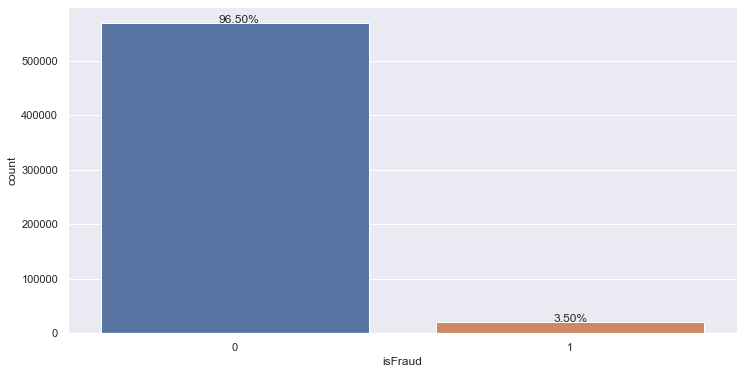

In [8]:
plt.figure(figsize = (12,6))
ax = sns.countplot(x = 'isFraud', data = transaction_train)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2%}'.format(height/transaction_train.shape[0]), (x + width/2 - 0.05, y + height + 0.01))


percetage_fraud = transaction_train[transaction_train['isFraud'] == 1]['isFraud'].sum()/transaction_train.shape[0] * 100
percetage_not_fraud = transaction_train[transaction_train['isFraud'] == 0]['isFraud'].count()/transaction_train.shape[0] * 100
print('Percentage of fraud values:',percetage_fraud)
print('Percentage of not fraud values:',percetage_not_fraud)

The dataset contains a only 3.5% of fraud values compared to 96% of non fraud transactions.In practical sense 3.5% is a lot of fraud transaction so we have to train our model to identify these properly and redude false positives.

### TransactonAmt  <a id = "TAmt"></a>

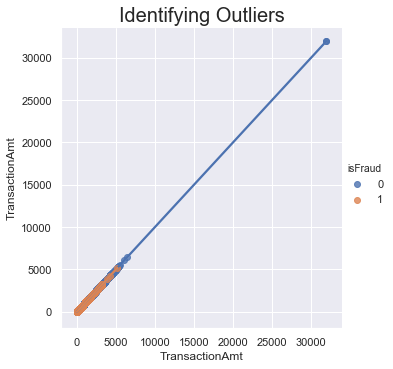

In [9]:
ax1 = sns.lmplot(x = 'TransactionAmt', y = 'TransactionAmt',data = transaction_train, hue = 'isFraud')
ax1 = plt.gca()
ax1.set_title("Identifying Outliers", fontsize = 20)
plt.show()

In [10]:
transaction_train[transaction_train['TransactionAmt'] > 25000]

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
274336,3261336,0,6652360,31937.391,W,16075,514.0,150.0,mastercard,102.0,credit,205.0,87.0,27.0,NaN,yahoo.com,NaN,1.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,T,T,T,NaN,NaN,NaN,F,F,T,1.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1422.390015,1422.390015,1422.390015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1422.390015,1422.390015,1422.390015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274339,3261339,0,6652391,31937.391,W,16075,514.0,150.0,mastercard,102.0,credit,205.0,87.0,27.0,NaN,yahoo.com,NaN,1.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,T,T,T,NaN,NaN,NaN,F,F,T,1.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0

Data has an outlier which can influence the ditrsibution of data, as we can see above these are not fraud transactions and let us exclude these for the further analysis.Let's look at at how the rest of the values are to further investigate

In [11]:
print(pd.cut(transaction_train['TransactionAmt'], 5).value_counts())

(-31.686, 6387.679]       590537
(25549.963, 31937.391]         2
(6387.679, 12775.107]          1
(19162.535, 25549.963]         0
(12775.107, 19162.535]         0
Name: TransactionAmt, dtype: int64


considering the values below 6500 and analysizing the quantiles

In [12]:
print(transaction_train[transaction_train['TransactionAmt'] < 6500]['TransactionAmt']\
                      .quantile([.01, .025, .1, .25, .5, .75, .9, .975, .99,1]))

0.010       9.244
0.025      14.501
0.100      25.950
0.250      43.321
0.500      68.758
0.750     125.000
0.900     275.293
0.975     648.190
0.990    1104.000
1.000    6450.970
Name: TransactionAmt, dtype: float64


 Most of the values are between 0 and 1110 let's plot the distribution of these values

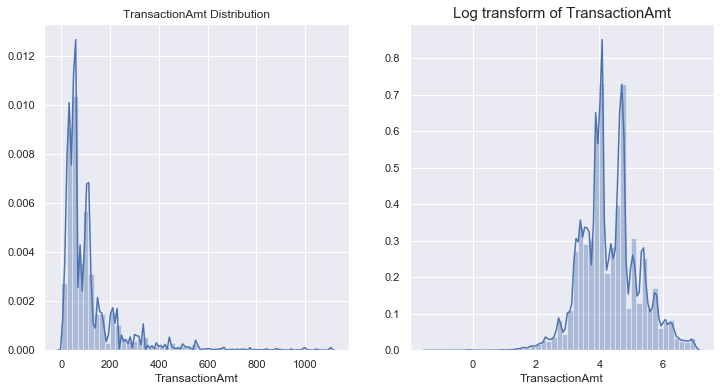

In [13]:
plt.figure(figsize= (12,6))
#plt.suptitle('TransactionAmt Distribution', fontsize = 20)

plt.subplot(121)
ax1 = sns.distplot(transaction_train[transaction_train['TransactionAmt']<1110]['TransactionAmt'])
ax1.set_title('TransactionAmt Distribution')

plt.subplot(122)
ax2 = sns.distplot(np.log(transaction_train[transaction_train['TransactionAmt']<1110]['TransactionAmt']))
ax2.set_title('Log transform of TransactionAmt', fontsize = 15)
plt.show()

The distribution of the values before log transformation appears to be right skewed and the values 
above Q3+1.5*InterQuantileRange are outliers.

Lets have a look at the boxplots for fraud and not fraud categories 

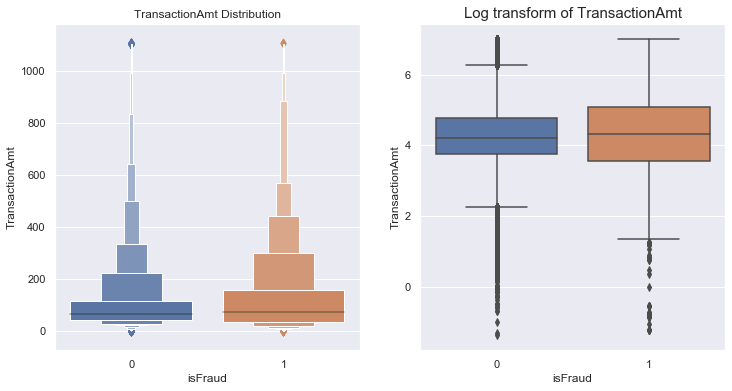

In [14]:
plt.figure(figsize= (12,6))
#plt.suptitle('TransactionAmt Distribution', fontsize = 20)

plt.subplot(121)
ax1 = sns.boxenplot(y = transaction_train[transaction_train['TransactionAmt']<1110]['TransactionAmt'], x = transaction_train['isFraud'])
ax1.set_title('TransactionAmt Distribution')

plt.subplot(122)
ax2 = sns.boxplot(y = np.log(transaction_train[transaction_train['TransactionAmt']<1110]['TransactionAmt']),x = transaction_train['isFraud'])
ax2.set_title('Log transform of TransactionAmt', fontsize = 15)
plt.show()

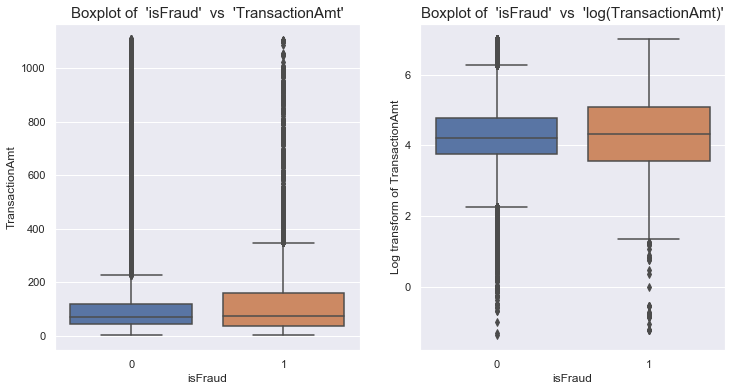

In [15]:
plt.figure(figsize= (12,6))

plt.subplot(121)
ax1 = sns.boxplot(x = 'isFraud', y = 'TransactionAmt' ,data = transaction_train[transaction_train['TransactionAmt']<1110])
ax1.set_title("Boxplot of  'isFraud'  vs  'TransactionAmt'", fontsize = 15)
ax1.set_ylabel('TransactionAmt')

plt.subplot(122)
ax2 = sns.boxplot(x = 'isFraud', y = np.log(transaction_train['TransactionAmt']) ,data = transaction_train[transaction_train['TransactionAmt']<1110])
ax2.set_title("Boxplot of  'isFraud'  vs  'log(TransactionAmt)'", fontsize = 15)
ax2.set_ylabel('Log transform of TransactionAmt')
plt.show()

### ProductCD <a id = "PCD"></a>

Let us draw a countplot to understand the various categories in ProductCD

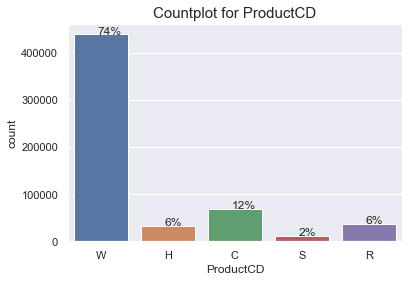

In [16]:
plt.title('Countplot for ProductCD', fontsize = 15)
ax = sns.countplot(transaction_train['ProductCD'])
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height/transaction_train.shape[0]), (x + width/2 - 0.05, y + height + 0.01))



W and R appear to be the dominant categories with S being the least

let us now plot the count for each category of ProductCD based on isFraud  

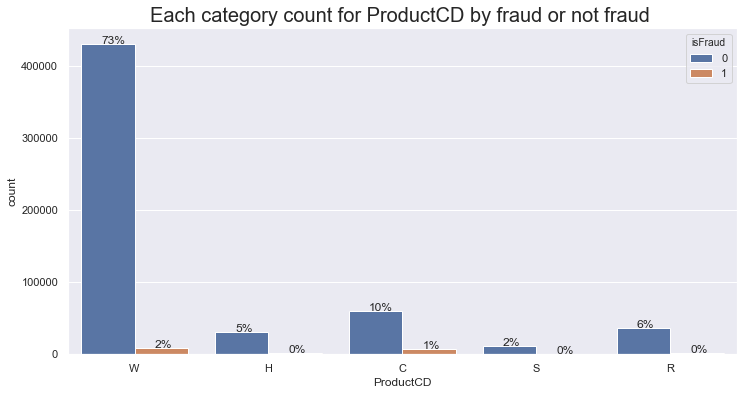

In [17]:
plt.figure(figsize = (12,6))
plt.title('Each category count for ProductCD by fraud or not fraud ', fontsize = 20)
ax = sns.countplot(x = 'ProductCD', hue = 'isFraud', data = transaction_train)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height/transaction_train.shape[0]), (x + width/2 - 0.05, y + height + 0.01))

W and C categories have the most fraud counts

Let's have a look at the distribution of the transaction amount for each of these categories, seperated in to fraud and not fraud groups a violin plot(shows both boxplot and kde) can be used to visualize this, In order to visaulize this properly let us consider the data where Transaction amount is less than 1110

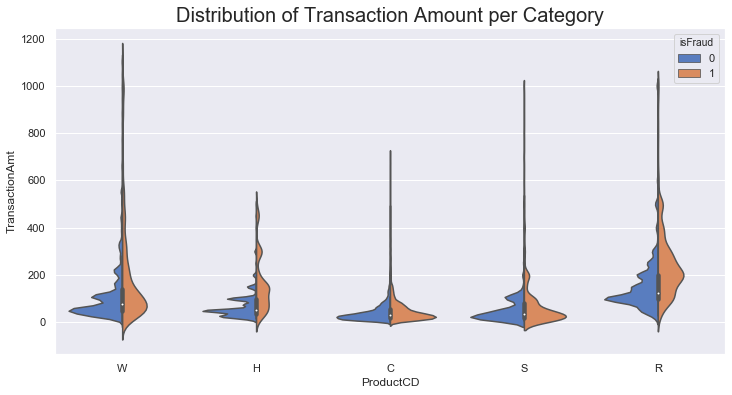

In [18]:
plt.figure(figsize = (12,6))
plt.title('Distribution of Transaction Amount per Category', fontsize = 20)
ax = sns.violinplot(x='ProductCD', y="TransactionAmt", hue="isFraud",
                    data=transaction_train[transaction_train['TransactionAmt'] < 1110], palette="muted", split = True)

### Card Features ( Card1 - Card6 )  <a id = "cardfeatures"></a>

In [19]:
print(transaction_train.loc[:,'card1':'card6'].dtypes)
for i in range(1,7):
    print('card'+ str(i)+' unique values:',transaction_train['card'+str(i)].unique().shape[0])

card1      int64
card2    float64
card3    float64
card4     object
card5    float64
card6     object
dtype: object
card1 unique values: 13553
card2 unique values: 501
card3 unique values: 115
card4 unique values: 5
card5 unique values: 120
card6 unique values: 5


- card1, card2, card3, card5 are categorical varibles with numerical values and card4 and card6 are categorical values with string values.
- one of the category is Null as unique() includes them, we have to deal with them later
- let's first visualize the count distribution of card4 and card6 


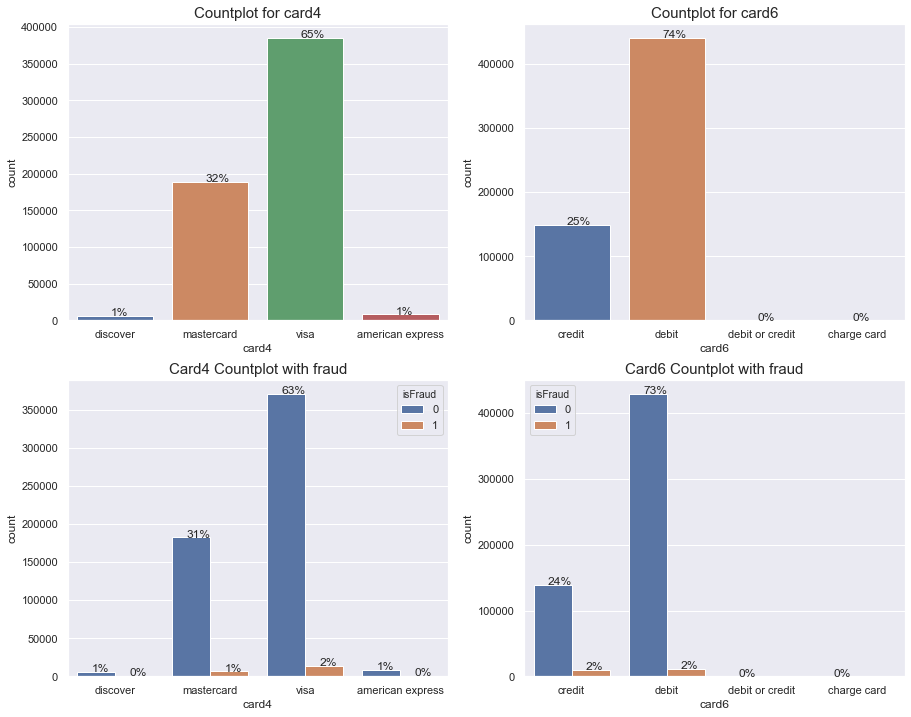

In [20]:
plt.figure(figsize = (15,12))

plt.subplot(221)
ax1 = sns.countplot(x = transaction_train['card4'])
ax1.set_title('Countplot for card4', fontsize = 15)
for p in ax1.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax1.annotate('{:.0%}'.format(height/transaction_train.shape[0]), (x + width/2 - 0.05, y + height + 0.01))

plt.subplot(222)
ax2 = sns.countplot(x = transaction_train['card6'])
ax2.set_title('Countplot for card6', fontsize = 15)
for p in ax2.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax2.annotate('{:.0%}'.format(height/transaction_train.shape[0]), (x + width/2 - 0.05, y + height + 0.01))

plt.subplot(223)
ax3 = sns.countplot(x = 'card4', hue = 'isFraud', data = transaction_train)
ax3.set_title('Card4 Countplot with fraud', fontsize = 15)
for p in ax3.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax3.annotate('{:.0%}'.format(height/transaction_train.shape[0]), (x + width/2 - 0.05, y + height + 0.01))


plt.subplot(224)
ax4 = sns.countplot(x = 'card6', hue = 'isFraud', data = transaction_train)
ax4.set_title('Card6 Countplot with fraud', fontsize = 15)
for p in ax4.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax4.annotate('{:.0%}'.format(height/transaction_train.shape[0]), (x + width/2 - 0.05, y + height + 0.01))


plt.show()


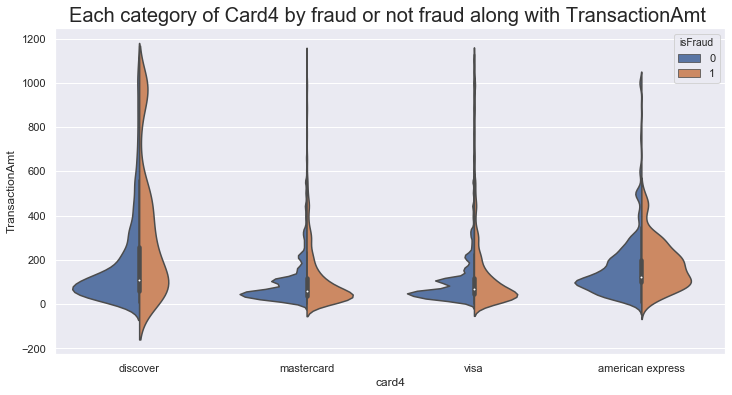

In [21]:
plt.figure(figsize = (12,6))
plt.title('Each category of Card4 by fraud or not fraud along with TransactionAmt ', fontsize = 20)
ax = sns.violinplot(x = 'card4',y = 'TransactionAmt', hue = 'isFraud',split = True, data = transaction_train[transaction_train['TransactionAmt']<1110])

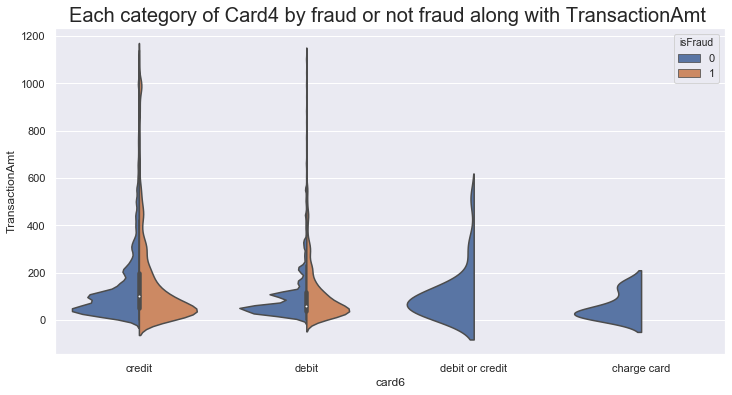

In [22]:
plt.figure(figsize = (12,6))
plt.title('Each category of Card4 by fraud or not fraud along with TransactionAmt ', fontsize = 20)
ax = sns.violinplot(x = 'card6',y = 'TransactionAmt', hue = 'isFraud',split = True, data = transaction_train[transaction_train['TransactionAmt']<1110])

lets look at the quantiles of the numeric values of the remaining cards

In [23]:
print(transaction_train.loc[:,['card1','card2','card3','card5']].quantile([.01, .025, .1, .25, .5, .75, .9, .975, .99]))

         card1  card2  card3  card5
0.010   1338.0  100.0  144.0  102.0
0.025   1675.0  111.0  150.0  102.0
0.100   2803.0  111.0  150.0  126.0
0.250   6019.0  214.0  150.0  166.0
0.500   9678.0  361.0  150.0  226.0
0.750  14184.0  512.0  150.0  226.0
0.900  16582.1  555.0  150.0  226.0
0.975  18018.0  583.0  185.0  226.0
0.990  18238.0  583.0  185.0  226.0


plotting the probability ditribution of these will give a better understanding of these variables

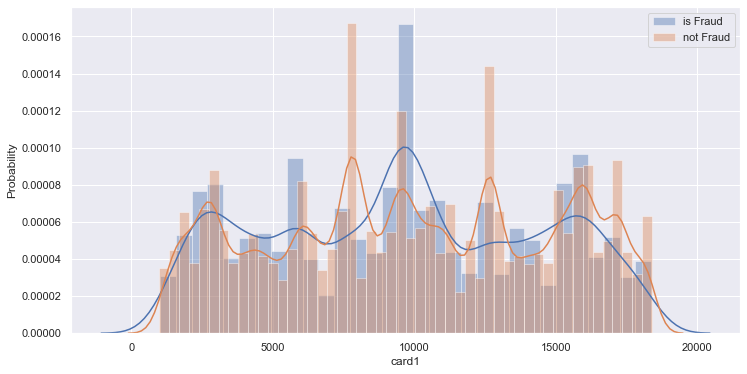

In [24]:
plt.figure(figsize=(12,6))
ax = sns.distplot(transaction_train[transaction_train['isFraud'] == 1]['card1'], label = 'is Fraud')
sns.distplot(transaction_train[transaction_train['isFraud'] == 0]['card1'], label = 'not Fraud')
ax.set_ylabel('Probability')
ax.legend()
plt.show()

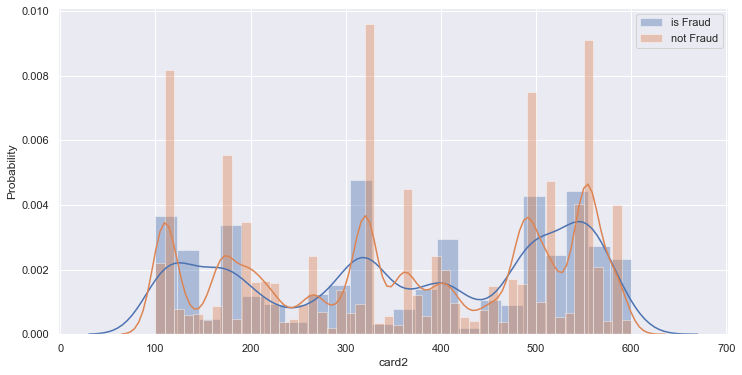

In [25]:
plt.figure(figsize=(12,6))
ax = sns.distplot(transaction_train[transaction_train['isFraud'] == 1]['card2'], label = 'is Fraud')
sns.distplot(transaction_train[transaction_train['isFraud'] == 0]['card2'], label = 'not Fraud')
ax.set_ylabel('Probability')
ax.legend()
plt.show()

As seen in the quantile analysis most of the values for card 3 are below 150 so the distribution plot won't be properly visiblle. let's plot count of the variable instead

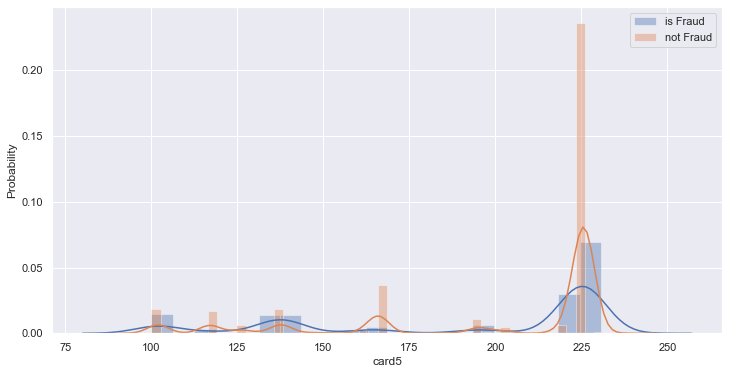

In [26]:
plt.figure(figsize=(12,6))
ax = sns.distplot(transaction_train[transaction_train['isFraud'] == 1]['card5'], label = 'is Fraud')
sns.distplot(transaction_train[transaction_train['isFraud'] == 0]['card5'], label = 'not Fraud')
ax.set_ylabel('Probability')
ax.legend()
plt.show()

### Email Domians  <a id = "ED"></a>

let us look at the NA values present in both R and P email domains.

In [27]:
print('NA values percentage in R_emaildomain:',transaction_train['R_emaildomain'].isna().mean() * 100)
print('NA values percentage in P_emaildomain:',transaction_train['P_emaildomain'].isna().mean() * 100)

NA values percentage in R_emaildomain: 76.75161716395164
NA values percentage in P_emaildomain: 15.99485216920107


There are a lot of domains in both these varibles let us consider the top 10 along with NA values(consider  NA to be -1).these domains are shown below


In [28]:
print(transaction_train['R_emaildomain'].fillna(-1).value_counts(dropna = False)[0:10].reset_index())
print(transaction_train['P_emaildomain'].fillna(-1).value_counts(dropna = False)[0:10].reset_index())

           index  R_emaildomain
0             -1         453249
1      gmail.com          57147
2    hotmail.com          27509
3  anonymous.com          20529
4      yahoo.com          11842
5        aol.com           3701
6    outlook.com           2507
7    comcast.net           1812
8   yahoo.com.mx           1508
9     icloud.com           1398
           index  P_emaildomain
0      gmail.com         228355
1      yahoo.com         100934
2             -1          94456
3    hotmail.com          45250
4  anonymous.com          36998
5        aol.com          28289
6    comcast.net           7888
7     icloud.com           6267
8    outlook.com           5096
9        msn.com           4092


Plotting these counts along with the percentage of fraud for each category

In [29]:
dummy = transaction_train['R_emaildomain'].fillna(-1).value_counts(dropna = False)[0:10].reset_index()
dummy.columns = ['R_emaildomain', 'count']
dummy2 = transaction_train[transaction_train['isFraud'] == 0].fillna(-1).groupby(['R_emaildomain']).count()\
                    .sort_values(by = 'TransactionID', ascending = False).reset_index()[['isFraud','R_emaildomain']]
dummy2.columns = ['isnotFraud', 'R_emaildomain']
dummy3 = transaction_train[transaction_train['isFraud'] == 1].fillna(-1).groupby(['R_emaildomain']).count()\
                    .sort_values(by = 'TransactionID', ascending = False).reset_index()[['isFraud','R_emaildomain']]
dummy3.columns = ['isFraud', 'R_emaildomain']
dummy4 = transaction_train.fillna(-1).groupby('R_emaildomain').sum().sort_values(by = 'TransactionAmt', ascending = False)\
                        .reset_index()[['R_emaildomain', 'TransactionAmt']][0:10]
dummy = dummy.merge(dummy2, on = 'R_emaildomain', how = 'left')
dummy = dummy.merge(dummy3, on = 'R_emaildomain', how = 'left')
dummy['Fraud_percentage'] = dummy['isFraud']/ (dummy['isnotFraud'] + dummy['isFraud']) * 100

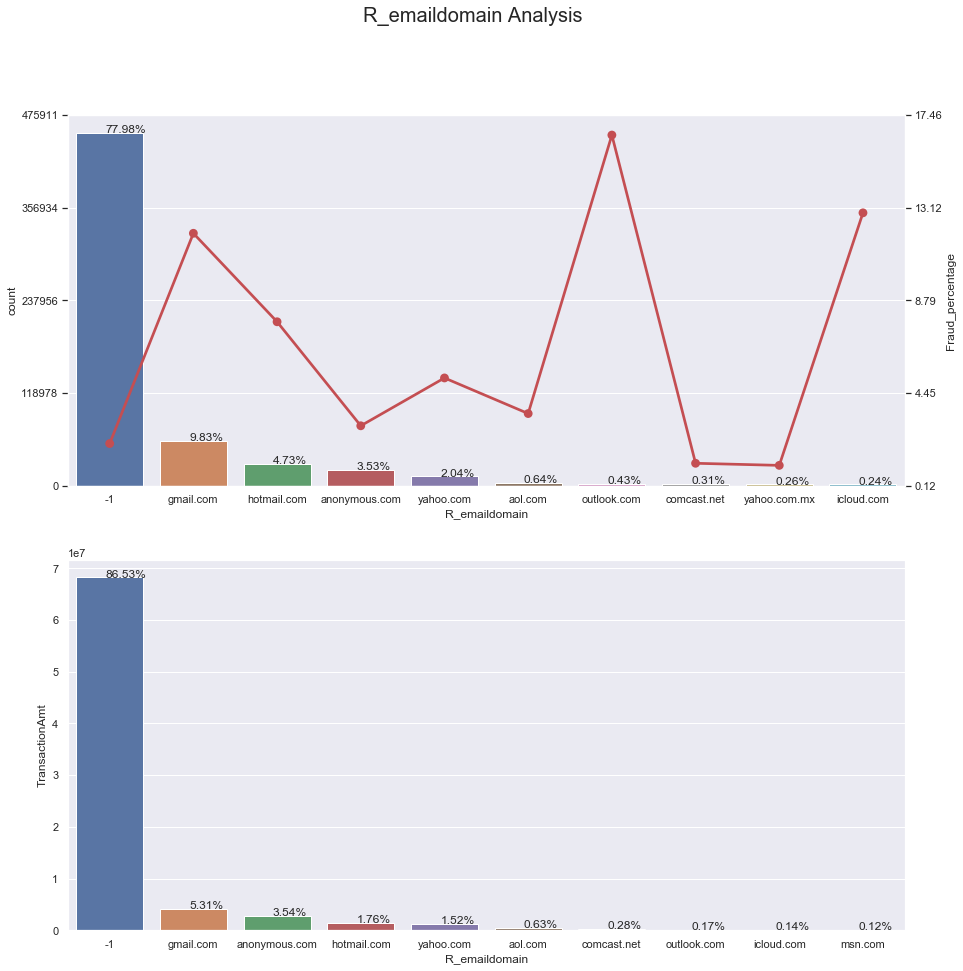

In [30]:
plt.figure(figsize=(15,15))
plt.subplot(211)
plt.suptitle(t = 'R_emaildomain Analysis', fontsize = 20)
ax1 = sns.barplot(x = 'R_emaildomain', y = 'count', data = dummy)
for p in ax1.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax1.annotate('{:.2%}'.format(height/dummy['count'].sum()), (x + width/2 - 0.05, y + height + 0.01))
ax2 = ax1.twinx()
ax2 = sns.pointplot(x = 'R_emaildomain', y = 'Fraud_percentage', data = dummy, color = 'r')
ax2.grid(None)
ax1.set_yticks(np.linspace(ax1.get_ybound()[0], ax1.get_ybound()[1], 5))
ax2.set_yticks(np.linspace(ax2.get_ybound()[0], ax2.get_ybound()[1], 5))

plt.subplot(212)
ax3 = sns.barplot(x = dummy4['R_emaildomain'], y = dummy4['TransactionAmt'])
for p in ax3.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax3.annotate('{:.2%}'.format(height/dummy4['TransactionAmt'].sum()), (x + width/2 - 0.05, y + height + 0.01))
plt.show()

In [31]:
dummy = transaction_train['P_emaildomain'].fillna(-1).value_counts(dropna = False)[0:10].reset_index()
dummy.columns = ['P_emaildomain', 'Count']
dummy2 = transaction_train[transaction_train['isFraud'] == 0].fillna(-1).groupby(['P_emaildomain']).count()\
                    .sort_values(by = 'TransactionID', ascending = False).reset_index()[['isFraud','P_emaildomain']]
dummy2.columns = ['isnotFraud', 'P_emaildomain']
dummy3 = transaction_train[transaction_train['isFraud'] == 1].fillna(-1).groupby(['P_emaildomain']).count()\
                    .sort_values(by = 'TransactionID', ascending = False).reset_index()[['isFraud','P_emaildomain']]
dummy3.columns = ['isFraud', 'P_emaildomain']
dummy4 = transaction_train.fillna(-1).groupby('P_emaildomain').sum().sort_values(by = 'TransactionAmt', ascending = False)\
                        .reset_index()[['P_emaildomain', 'TransactionAmt']][0:10]
dummy = dummy.merge(dummy2, on = 'P_emaildomain', how = 'left')
dummy = dummy.merge(dummy3, on = 'P_emaildomain', how = 'left')
dummy['Fraud_percentage'] = dummy['isFraud']/ (dummy['isnotFraud'] + dummy['isFraud']) * 100

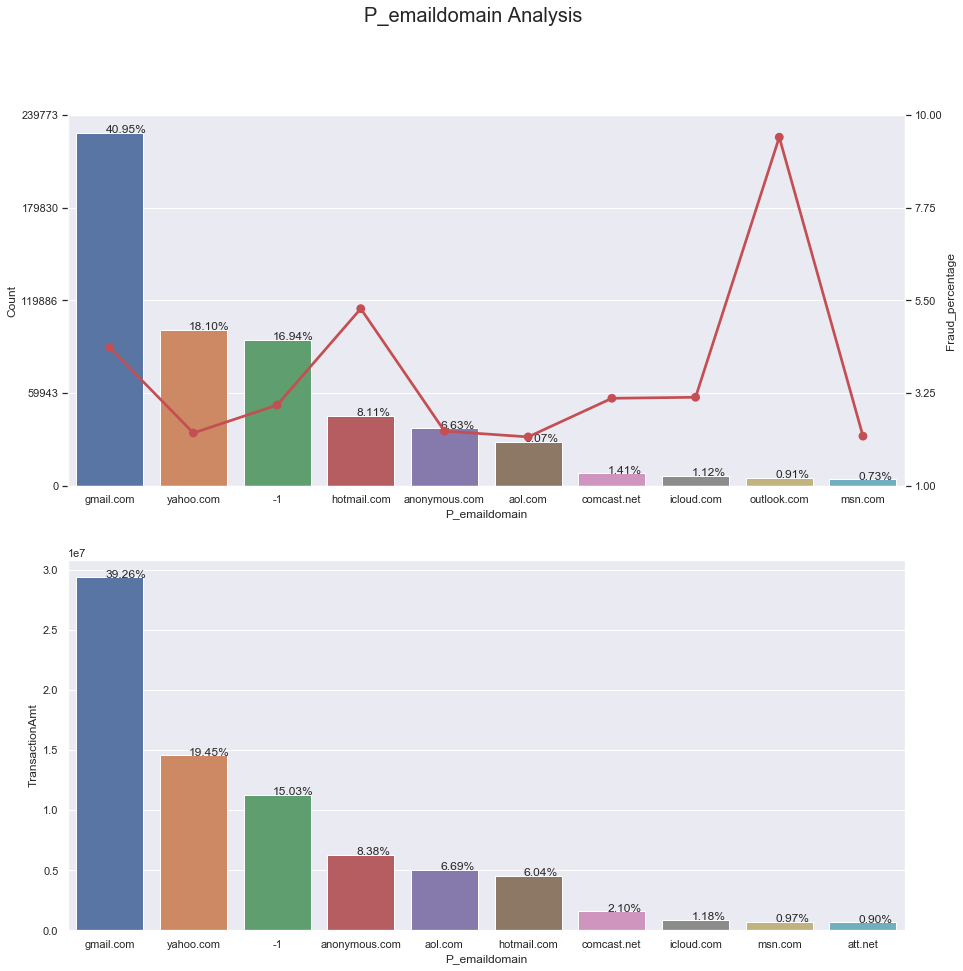

In [32]:
plt.figure(figsize=(15,15))
plt.suptitle(t = 'P_emaildomain Analysis', fontsize = 20)
plt.subplot(211)
ax1 = sns.barplot(x = 'P_emaildomain', y = 'Count', data = dummy)
for p in ax1.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax1.annotate('{:.2%}'.format(height/dummy['Count'].sum()), (x + width/2 - 0.05, y + height + 0.01))
ax2 = ax1.twinx()
ax2 = sns.pointplot(x = 'P_emaildomain', y = 'Fraud_percentage', data = dummy, color = 'r')
ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))
ax2.grid(None)
ax1.set_yticks(np.linspace(ax1.get_ybound()[0], ax1.get_ybound()[1], 5))
ax2.set_yticks(np.linspace(ax2.get_ybound()[0], ax2.get_ybound()[1], 5))
plt.subplot(212)
ax3 = sns.barplot(x = dummy4['P_emaildomain'], y = dummy4['TransactionAmt'])
for p in ax3.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax3.annotate('{:.2%}'.format(height/dummy4['TransactionAmt'].sum()), (x + width/2 - 0.05, y + height + 0.01))
plt.show()
#ax3.set_yscale('log')
plt.show()

### c1-c14 <a id = "CFeatures"></a>

In [33]:
transaction_train.loc[:,'C1':'C14'].isna().sum()

C1     0
C2     0
C3     0
C4     0
C5     0
C6     0
C7     0
C8     0
C9     0
C10    0
C11    0
C12    0
C13    0
C14    0
dtype: int64

These features have no null values.Let define a function to plot the various analysis (all the columns C1 - c14).

In [34]:
def data_to_plot_C(col):

    dummy = transaction_train[col].value_counts().reset_index()[0:10]
    dummy.columns = [col,'Count']

    dummy2 = transaction_train[transaction_train['isFraud'] == 0].groupby([col]).count()\
                        .sort_values(by = 'TransactionID', ascending = False).reset_index()[['isFraud',col]]
    dummy2.columns = ['isnotFraud', col]

    dummy3 = transaction_train[transaction_train['isFraud'] == 1].groupby([col]).count()\
                        .sort_values(by = 'TransactionID', ascending = False).reset_index()[['isFraud',col]]
    dummy3.columns = ['isFraud', col]

    dummy4 = transaction_train.fillna(-1).groupby(col).sum().sort_values(by = 'TransactionAmt', ascending = False)\
                            .reset_index()[[col, 'TransactionAmt']][0:10]

    dummy = dummy.merge(dummy2, on = col, how = 'left')
    dummy = dummy.merge(dummy3, on = col, how = 'left')
    dummy['Fraud_percentage'] = dummy['isFraud']/ (dummy['isnotFraud'] + dummy['isFraud']) * 100
    plt.figure(figsize=(15,15))
    plt.suptitle(t = col + 'Analysis', fontsize = 20)
    plt.subplot(211)
    ax1 = sns.barplot(x = col, y = 'Count', data = dummy)
    
    for p in ax1.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax1.annotate('{:.2%}'.format(height/dummy['Count'].sum()), (x + width/2 - 0.05, y + height + 0.01))
    ax2 = ax1.twinx()
    ax2 = sns.pointplot(x = col, y = 'Fraud_percentage', data = dummy, color = 'r')
    ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))
    ax2.grid(None)
    ax1.set_yticks(np.linspace(ax1.get_ybound()[0], ax1.get_ybound()[1], 5))
    ax2.set_yticks(np.linspace(ax2.get_ybound()[0], ax2.get_ybound()[1], 5))
    plt.subplot(212)
    ax3 = sns.barplot(x = dummy4[col], y = dummy4['TransactionAmt'])
    for p in ax3.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax3.annotate('{:.2%}'.format(height/dummy4['TransactionAmt'].sum()), (x + width/2 - 0.05, y + height + 0.01))
    #ax3.set_yscale('log')
    plt.show()
    

Change the value of the parameter of the function to Visualze the variable

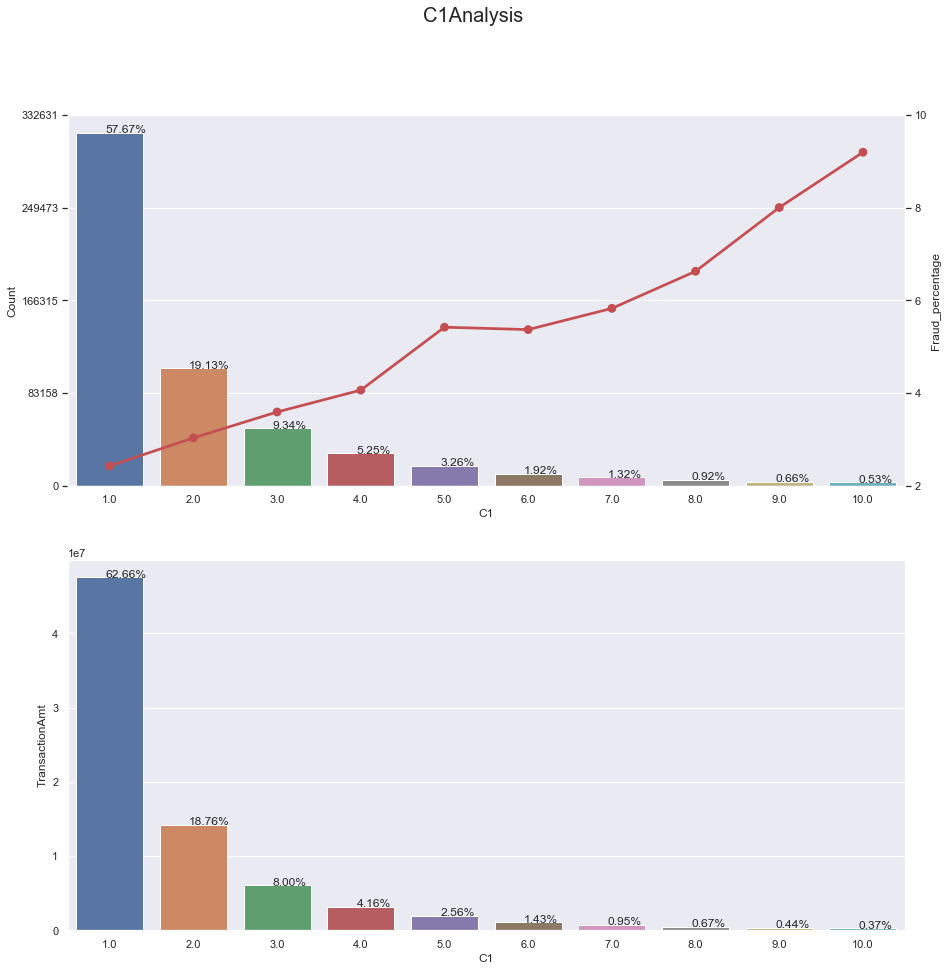

In [35]:
data_to_plot_C('C1')

### M1 - M9 <a id = "MFeatures"></a>

M1 - M9 are categorical variables with values T or F except for M4 which has values ['M0','M1','M2']


In [36]:
#lets have a look at the Null values in these columns
transaction_train.loc[:,'M1':'M9'].isna().sum()/ transaction_train.shape[0]

M1    0.459071
M2    0.459071
M3    0.459071
M4    0.476588
M5    0.593494
M6    0.286788
M7    0.586353
M8    0.586331
M9    0.586331
dtype: float64

- There are a lot of null values so let us consider these too for the analysis.
- lets define a function to plot the count and distribution  of these Variables

In [37]:
def plot_m(col):
    dummy = transaction_train[col].fillna(-1).value_counts(dropna = False)[0:10].reset_index()
    dummy.columns = [col, 'Count']
    dummy2 = transaction_train[transaction_train['isFraud'] == 0].fillna(-1).groupby([col]).count()\
                        .sort_values(by = 'TransactionID', ascending = False).reset_index()[['isFraud',col]]
    dummy2.columns = ['isnotFraud', col]
    dummy3 = transaction_train[transaction_train['isFraud'] == 1].fillna(-1).groupby([col]).count()\
                        .sort_values(by = 'TransactionID', ascending = False).reset_index()[['isFraud',col]]
    dummy3.columns = ['isFraud', col]
    dummy4 = transaction_train.fillna(-1).groupby(col).sum().sort_values(by = 'TransactionAmt', ascending = False)\
                            .reset_index()[[col, 'TransactionAmt']][0:10]
    dummy = dummy.merge(dummy2, on = col, how = 'left')
    dummy = dummy.merge(dummy3, on = col, how = 'left')
    dummy['Fraud_percentage'] = dummy['isFraud']/ (dummy['isnotFraud'] + dummy['isFraud']) * 100
    
    
    plt.figure(figsize=(15,15))
    plt.suptitle(t = col + 'Analysis', fontsize = 20)
    plt.subplot(311)
    ax1 = sns.barplot(x = col, y = 'Count', data = dummy)
    
    for p in ax1.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax1.annotate('{:.2%}'.format(height/dummy['Count'].sum()), (x + width/2 - 0.05, y + height + 0.01))
    ax2 = ax1.twinx()
    ax2 = sns.pointplot(x = col, y = 'Fraud_percentage', data = dummy, color = 'r')
    ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))
    ax2.grid(None)
    ax1.set_yticks(np.linspace(ax1.get_ybound()[0], ax1.get_ybound()[1], 5))
    ax2.set_yticks(np.linspace(ax2.get_ybound()[0], ax2.get_ybound()[1], 5))
    plt.subplot(312)
    ax3 = sns.violinplot(x = col,y = 'TransactionAmt', hue = 'isFraud',split = True, data = transaction_train[transaction_train['TransactionAmt']<1110].fillna(-1))
    #ax3.set_yscale('log')
    plt.subplot(313)
    ax4 = sns.barplot(x = dummy4[col], y = dummy4['TransactionAmt'])
    for p in ax4.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax4.annotate('{:.2%}'.format(height/transaction_train['TransactionAmt'].sum()), (x + width/2 - 0.05, y + height + 0.01))
    plt.show()

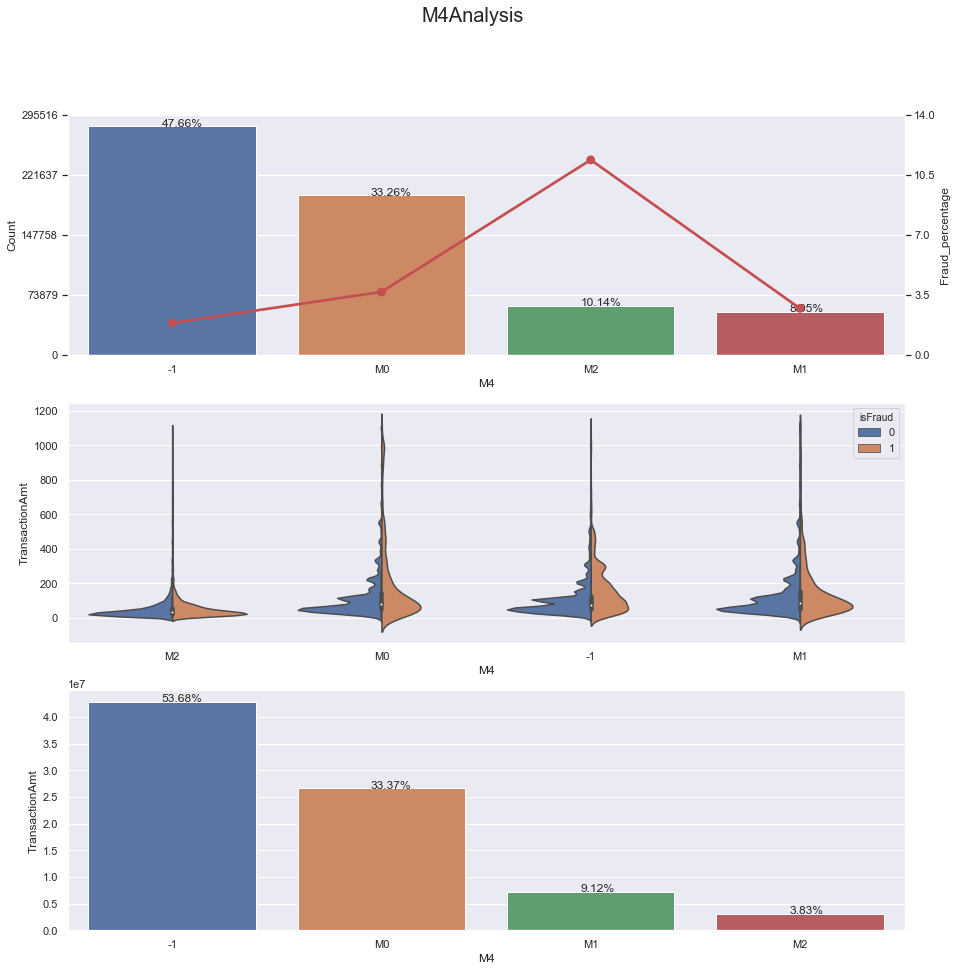

In [38]:
#To visualize the required variable change the parameter of the function
plot_m('M4')

### TransactionDT <a id = "TDT"></a>

Lets look at some of the metrics of TransactionDT

In [39]:
print('TransactionDT min:',transaction_train['TransactionDT'].min())
print('TransactionDT max:',transaction_train['TransactionDT'].max())
print('TransactionDT null values:',transaction_train['TransactionDT'].isna().sum())

TransactionDT min: 86400
TransactionDT max: 15811131
TransactionDT null values: 0


86400 is 24 hrs * 60 min * 60 sec so the units seem to be seconds.lets convert it in to days and plot to the distribution 

In [40]:
#n is the width of bin of the plot
def timeplot(col, n):
    dummy1 = transaction_train[transaction_train['isFraud']  == 1][col]/(3600 * 24)
    dummy2 = transaction_train[transaction_train['isFraud']  == 0][col]/(3600 * 24)
    #dummy1.merge(dummy2)
    plt.figure(figsize=(15,6))
    bins = np.arange(1, 183, n)
    ax = sns.distplot(dummy1, bins = bins, label = 'Fraud')
    ax.set_ylabel('probability')
    sns.distplot(dummy2, bins, label = 'notFraud')
    
    ax.legend()
    if n == 1:
        ax.set_xticks( np.arange(1, 183, 10))
    if n == 7:
         ax.set_xticks(bins)
        
    #ax.set_xtick
   
    

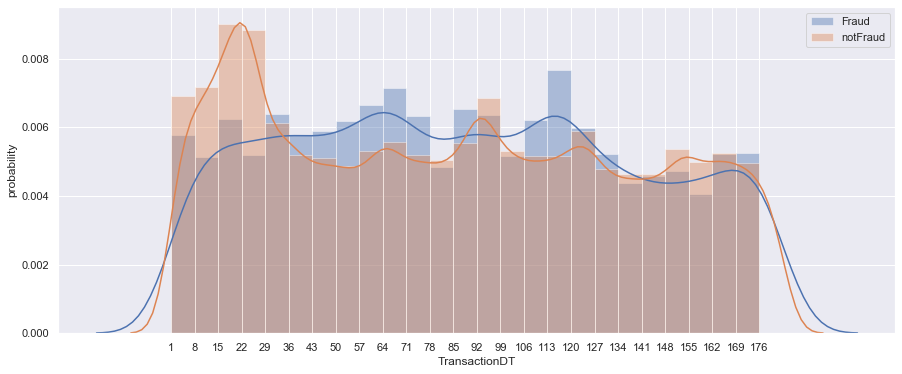

In [41]:
#to change the time frame chane the value of n of the function
timeplot('TransactionDT', 7)

# Feature Engineering <a id = "FE"></a>

Lets us look at the null values of the data

In [42]:
#find the columns with percentage of na values more than the given percentage
def na_value(data, percentage):
    na_cols = (data.isna().sum()/data.shape[0]).reset_index()
    na_cols.columns = ['column name','% na values']
    na_cols['% na values'] = na_cols['% na values'] * 100
    return na_cols[na_cols['% na values'] > percentage]['column name']
    

In [43]:
na_value(transaction_train, 30)

13             dist1
14             dist2
16     R_emaildomain
32                D2
33                D3
35                D5
36                D6
37                D7
38                D8
39                D9
41               D11
42               D12
43               D13
44               D14
46                M1
47                M2
48                M3
49                M4
50                M5
52                M7
53                M8
54                M9
55                V1
56                V2
57                V3
58                V4
59                V5
60                V6
61                V7
62                V8
63                V9
64               V10
65               V11
192             V138
193             V139
194             V140
195             V141
196             V142
197             V143
198             V144
199             V145
200             V146
201             V147
202             V148
203             V149
204             V150
205             V151
206          

As the data for is about 600MB let's reduce it so that we dont run out of system memory

In [44]:
#use this function to reduce memory of the data 
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df


In [45]:
transaction_train = reduce_mem_usage(transaction_train)

Mem. usage decreased to 542.35 Mb (69.4% reduction)


Let's us do lift analysis for each category,  let us define a function so that we can use it for all variables.


In [46]:
def lift_analysis(column):
    fraud_rate = transaction_train.groupby(column).mean().reset_index()[[column, 'isFraud']]
    pop = transaction_train.groupby(column).count().reset_index()[[column, 'TransactionID']]
    pop.columns = [column, 'Count']
    overall_fraud_rate = transaction_train[transaction_train['isFraud'] == 1].shape[0]/transaction_train.shape[0]
    fraud_rate['lift_ratio'] = fraud_rate['isFraud']/ overall_fraud_rate
    pop['Count_percentage']  = pop['Count']/ pop['Count'].sum() * 100
    dummy = fraud_rate.merge(pop, on = column, how = 'left' ) 
    return dummy

In [48]:
ProductCD_lift = lift_analysis('ProductCD')
ProductCD_lift

,ProductCD,isFraud,lift_ratio,Count,Count_percentage
0,C,0.116873,3.340173,68519,11.602770
1,H,0.047662,1.362169,33024,5.592170
2,R,0.037826,1.081050,37699,6.383818
3,S,0.058996,1.686068,11628,1.969045
4,W,0.020399,0.583006,439670,74.452196


In [49]:
card4_lift = lift_analysis('card4')
card4_lift.sort_values(by = 'Count', ascending = False)

,card4,isFraud,lift_ratio,Count,Count_percentage
3,visa,0.034756,0.993315,384767,65.329571
2,mastercard,0.034331,0.981164,189217,32.127146
0,american express,0.028698,0.820187,8328,1.414011
1,discover,0.077282,2.208677,6651,1.129273


In [50]:
card6_lift = lift_analysis('card6')
card6_lift.sort_values(by = 'Count', ascending = False)

,card6,isFraud,lift_ratio,Count,Count_percentage
2,debit,0.024263,0.693413,439938,74.696291
1,credit,0.066785,1.908682,148986,25.296068
3,debit or credit,0.000000,0.000000,30,0.005094
0,charge card,0.000000,0.000000,15,0.002547


In [51]:
lift_Pemail = lift_analysis('P_emaildomain')
lift_Pemail.sort_values(by = ['Count'], ascending  = False)[0:10]

,P_emaildomain,isFraud,lift_ratio,Count,Count_percentage
16,gmail.com,0.043542,1.244408,228355,46.031519
53,yahoo.com,0.022757,0.650398,100934,20.346151
19,hotmail.com,0.052950,1.513297,45250,9.121439
1,anonymous.com,0.023217,0.663546,36998,7.458011
2,aol.com,0.021811,0.623338,28289,5.702462
9,comcast.net,0.031187,0.891300,7888,1.590053
23,icloud.com,0.031434,0.898385,6267,1.263294
35,outlook.com,0.094584,2.703171,5096,1.027245
31,msn.com,0.021994,0.628583,4092,0.824860
3,att.net,0.007439,0.212593,4033,0.812967


In [ ]:
lift_remail = lift_analysis('R_emaildomain')
lift_remail.sort_values(by = ['Count'], ascending  = False)[0:10]

In [ ]:
lift_analysis('C4').sort_values('Count', ascending = False)[0:10]

In [ ]:
lift_analysis('M2')

similary carrying out analysis for all the varibles.

while defining the features let us take the most important categories with high lift ratio and good count values.

lets define a function to model all these features

In [47]:
def data_for_model(data):
    #data = data[features].copy(deep = True)
    #data = data.copy(deep = True)
    data['card4_visa'] = np.where(data['card4'] == 'visa', 1, 0)
    data['card4_master'] = np.where(data['card4'] == 'mastercard', 1, 0)
    data['card4_amex'] = np.where(data['card4'] == 'american experess', 1, 0)
    data['card4_discover'] = np.where(data['card4'] == 'discover', 1, 0)
    data['card6_credit'] = np.where(data['card6'] == 'credit',1,0)
    data['card6_debit'] = np.where(data['card6'] == 'debit',1,0)
    data['card2_408'] = np.where(data['card2'] == 408,1, 0)
    data['card2_545'] = np.where(data['card2'] == 545,1, 0)
    cond = [data['card2'] == 583, data['card2'] == 553, data['card2'] == 514]
    choices = [1, 1 ,1]
    data['card2_482_452_413']  = np.select(cond,choices, default = 0)
    cond = [data['card1'] == 2616, data['card1'] == 9633, data['card1'] == 7585]
    choices = [1, 1 ,1]
    data['card1_2616_9633_7585']  = np.select(cond,choices, default = 0)
    data['card3_185'] = np.where(data['card3'] == 185,1, 0)
    data['card5_102'] = np.where(data['card5'] == 102 ,1,0)
    data['card5_138'] = np.where(data['card5'] == 138 ,1,0)
    data['card5_137'] = np.where(data['card5'] == 137 ,1,0)
    data['card5_219'] = np.where(data['card5'] == 219 ,1,0)
    
    data['p_gmail'] = np.where(data['P_emaildomain'] == 'gmail.com',1,0)
    data['p_outlook'] = np.where(data['P_emaildomain'] == 'outlook.com',1,0)
    data['p_hotamail'] = np.where(data['P_emaildomain'] == 'hotmail.com',1,0)
    data['r_gmail'] = np.where(data['R_emaildomain'] == 'gmail.com',1,0)
    data['r_icloud'] = np.where(data['R_emaildomain'] == 'icloud.com',1,0)
    data['r_outlook'] = np.where(data['R_emaildomain'] == 'outlook.com',1,0)
    data['r_hotmail'] = np.where(data['R_emaildomain'] == 'hotmail.com',1,0)
    
    data['pcd_C'] = np.where(data['ProductCD'] == 'C',1, 0)
    
    #exclude c3
    cond = [data['C1'] == 8, data['C1'] == 9, data['C1'] == 10]
    choices = [1, 1 ,1]
    data['C1_']  = np.select(cond,choices, default = 0)
    cond = [data['C2'] == 10, data['C2'] == 11, data['C2'] == 12, data['C2'] == 13, data['C2'] == 14, data['C2'] == 15]
    choices = [1, 1 ,1, 1, 1, 1]
    data['C2_10-15']  = np.select(cond,choices, default = 0)
    cond = [data['C2'] == 4, data['C2'] == 5, data['C2'] == 6, data['C2'] == 7, data['C2'] == 8, data['C2'] == 9]
    choices = [1, 1 ,1, 1, 1, 1]
    data['C2_4-9']  = np.select(cond,choices, default = 0)
    data['C4_0'] = np.where(data['C4'] == 0, 0, 1)
    data['C5_0'] = np.where(data['C5'] == 0,1,0)
    data['C6_4'] = np.where(data['C6'] == 4,1,0)
    data['C6_5'] = np.where(data['C6'] == 5,1,0)
    data['C6_6'] = np.where(data['C6'] == 6,1,0)
    cond = [data['C6'] == 7, data['C6'] == 8, data['C6'] == 9, data['C6'] == 10 , data['C6'] == 11, data['C6'] == 13]
    choices = [1, 1 ,1, 1, 1, 1]
    data['C6_7-13']  = np.select(cond,choices, default = 0)
    data['C7_0'] = np.where(data['C7'] == 0, 0, 1)
    data['C8_2'] = np.where(data['C8'] == 2, 1, 0)
    data['C8_3'] = np.where(data['C8'] == 3, 1, 0)
    data['C9_0'] = np.where(data['C9'] == 0, 1, 0)
    data['C10_2'] = np.where(data['C10'] == 2, 1, 0)
    data['C10_3'] = np.where(data['C10'] == 3, 1, 0)
    cond = [data['C10'] == 4, data['C10'] == 5, data['C10'] == 6, data['C10'] == 7]
    choices = [1, 1 ,1, 1]
    data['C10_4-7']  = np.select(cond,choices, default = 0)
    data['C11_3'] = np.where(data['C11'] == 3, 1, 0)
    data['C11_4'] = np.where(data['C11'] == 4, 1, 0)
    data['C11_5'] = np.where(data['C11'] == 5, 1, 0)
    data['C11_6'] = np.where(data['C11'] == 6, 1, 0)
    cond = [data['C11'] == 7, data['C11'] == 8]
    choices = [1, 1]
    data['C11_7-8']  = np.select(cond,choices, default = 0)
    data['C12_1'] = np.where(data['C12'] == 1, 1, 0)
    data['C12_2'] = np.where(data['C12'] == 2, 1, 0)
    cond = [data['C12'] == 3, data['C12'] == 4, data['C13'] == 5]
    choices = [1, 1, 1]
    data['C12_3-5']  = np.select(cond,choices, default = 0)
    data['C13_0'] = np.where(data['C13'] == 0, 1, 0)
    data['C14_0'] = np.where(data['C14'] == 0, 1, 0)
    
    
    for i in range(1,10):
        if i != 4:
            data['M'+str(i)+'_T'] = np.where(data['M' + str(i)] == 'T', 1, 0)
            data['M'+str(i)+'_F'] = np.where(data['M' + str(i)] == 'F', 1, 0)
    data['M4_M2'] = np.where(data['M4'] == 'M2', 1, 0)
    
    
    
    #data['log_TransactionAmt'] = np.log(data['TransactionAmt'])
    
    drop_cols = np.array(['TransactionID', 'TransactionDT', 'ProductCD', 'card1', 'card2','M4', 
       'card3', 'card4', 'card5', 'card6','addr1','addr2', 'dist1', 'dist2', 'R_emaildomain','C1',
       'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14',
       'P_emaildomain','D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7',
       'D8', 'D9','D10', 'D11', 'D12', 'D13', 'D14','D15', 'M1', 'M2', 'M3',
       'M5','M6', 'M7', 'M8', 'M9'])
    data.drop(drop_cols, axis = 1, inplace = True)
    v_cols = []
    for i in range(1, 340):
        v_cols.append('V' + str(i))
    #data.drop(v_cols, axis = 1, inplace = True)
    
    #data.drop(['isFraud','card4', 'card6', 'R_emaildomain', 'P_emaildomain', 'C1', 'C4', 'ProductCD', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9'], axis = 1, inplace = True)
    
    
    #model_data.drop(['card4', 'card6', 'R_emaildomain', 'P_emaildomain', 'C1', 'C4', 'ProductCD', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9'], axis = 1, inplace = True)
    
    
    #data.drop(['TransactionDT','card4', 'card6', 'P_emaildomain', 'C1', 'C4', 'ProductCD', 'M6'],  axis = 1, inplace = True)
    #data.drop(drop_cols,  axis = 1, inplace = True)
    #return model_data
    return data

lets make a copy of test and train data so that we can change the features without having to load the original data each time we change the function.

In [48]:
df = transaction_train.copy(deep = True)

In [49]:
df = data_for_model(df)

In [50]:
#seperating the response variable from train data
response_variable = df['isFraud']
df.drop(['isFraud'], axis = 1, inplace=True)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, response_variable, test_size=0.33, random_state=42)

In [57]:
X_train.fillna(-1, inplace = True)
X_test.fillna(-1, inplace = True)

# Model  <a id = "model"></a>

Let's build two models  RandomForest and a model with XGBoost

In [63]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators = 500, max_depth=50,criterion='entropy', random_state=0)
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [65]:
yhat = model_rf.predict(X_test)
#converting to dataframe and changing the column name to make in the format for submission
yhat = pd.DataFrame(yhat)
yhat.columns = ['isFraud']

In [66]:
yhat['isFraud'].value_counts()

0    193650
1      1229
Name: isFraud, dtype: int64

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,yhat['isFraud'], normalize = 1)

0.9691757449494302

In [75]:
yhat_rf_roc = model_rf.predict_proba(X_test)

In [76]:
#converting to dataframe and changing the column names
yhat_rf_roc = pd.DataFrame(yhat)
yhat_rf_roc.columns = ['isnotFraud', 'isFraud']
yhat_rf_roc

,isnotFraud,isFraud
0,0.976616,0.023384
1,0.979160,0.020840
2,0.994643,0.005357
3,0.917508,0.082492
4,0.994252,0.005748
...,...,...
194874,0.979160,0.020840
194875,0.914515,0.085485
194876,0.896918,0.103082
194877,0.990781,0.009219


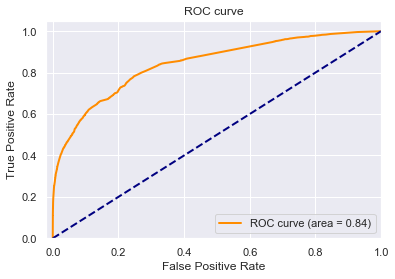

In [77]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, _ = roc_curve(y_test, yhat_rf_roc['isFraud'] )
roc_auc = auc(fpr, tpr)
#xgb.plot_importance(gbm)
#plt.show()
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [78]:
import datetime
a = datetime.datetime.now().replace(microsecond=0)
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# load data
#dataset = loadtxt('pima-indians-diabetes.csv', delimiter=",")
# split data into X and y
X = X_train
Y = y_train
# split data into train and test sets
#seed = 7
#test_size = 0.33
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# fit model no training data
model = xgb.XGBClassifier(n_estimators=500,learning_rate = 0.1,
tree_method='hist', max_depth = 50 )
model.fit(X, Y)
b = datetime.datetime.now().replace(microsecond=0)
print(b-a)

# make predictions for test data


0:00:31


In [79]:
y_pred_for_roc = model.predict_proba(X_test)
y_pred_for_roc = pd.DataFrame(y_pred_for_roc)

In [80]:
y_pred_for_roc.columns = ['isnotFraud', 'isFraud']
y_pred_for_roc

,isnotFraud,isFraud
0,0.737224,0.262776
1,0.737224,0.262776
2,0.737224,0.262776
3,0.718240,0.281760
4,0.737224,0.262776
...,...,...
194874,0.737224,0.262776
194875,0.737224,0.262776
194876,0.718240,0.281760
194877,0.737224,0.262776


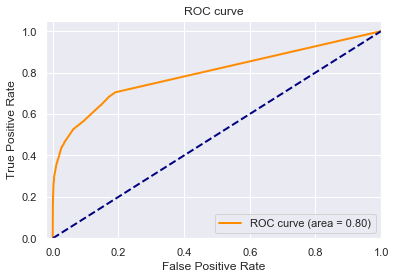

In [81]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, _ = roc_curve(y_test, y_pred_for_roc['isFraud'] )
roc_auc = auc(fpr, tpr)
#xgb.plot_importance(gbm)
#plt.show()
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [82]:
y_pred_1 = model.predict(X_test)
y_pred_1 = pd.DataFrame(y_pred_1)
y_pred_1.columns = ['isFraud']

In [83]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_1['isFraud'], normalize = 1)

0.9711461984102956

### References <a id = "ref" ></a> 
- [Data description](https://www.kaggle.com/c/ieee-fraud-detection/discussion/101203)